In [40]:
import os
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from platypus import Problem, EpsNSGAII, Real, ProcessPoolEvaluator
import csv
import logging
from itertools import chain
logging.basicConfig(level=logging.INFO)
plt.rcParams['figure.figsize'] = [12, 8]
sys.path.append('..')

In [32]:
# os.chdir("./MUSEH2O")
from susquehanna_model import susquehanna_model
import rbf_functions
rbf = rbf_functions.squared_exponential_rbf.__name__
output_dir = f"./output/{rbf}/"

In [36]:
for filename in os.listdir('data1999'):
    if filename.startswith('w'):
        globals()[f"{filename[:-4]}"] = np.loadtxt(f'data1999/{filename}')
varlist = []
variables = []
# for filename in os.listdir('data'):
#     if filename.endswith('variables.csv'):
#         varlist.append(filename[:-4])
#         df_temp = pd.read_csv(f"output/{filename}", header=None)
#         variables.append(df_temp.values.tolist())
# variables = list(chain.from_iterable(variables))
for filename in os.listdir(output_dir):
    if filename.endswith('variables.csv'):
        varlist.append(filename[:-4])
        df_temp = pd.read_csv(f"{output_dir}{filename}", header=None)
        variables.append(df_temp.values.tolist())
variables = list(chain.from_iterable(variables))

In [38]:
# RBFlist = ["exponential", "matern32"] # ["gaussian", "SE", "invmultiquadric", "invquadratic"]
# def model(RBFType, variables):
RBFType = "se"
# variables = globals()[f"{rbftype}_1234_variables"] + globals()[f"{rbftype}_2345_variables"]
numberOfInput = 2 # (time, storage of Conowingo)
numberOfOutput = 4  # Atomic, Baltimore,Chester, Downstream:- hydropower, environmental
numberOfRBF = 4  # numberOfInput + 2
# N = 2 * n * m + K * n  # check 32 with 2 inputs, 72 with 4 inputs

# Initialize model
nobjs = 6
nvars = int(numberOfRBF * 8)  # 8 = 2 centers + 2 radius + 4 weights
n_years = 1
susquehanna_river = susquehanna_model(108.5, 505.0, 5, n_years)  # l0, l0_MR, d0, years
# l0 = start level cono, l0_MR = start level muddy run, d0 = startday > friday = 5
susquehanna_river.load_data(0)  # 0 = historic, 1 = stochastic
susquehanna_river.set_log(True)
susquehanna_river.setRBF(numberOfRBF, numberOfInput, numberOfOutput, RBFType)

for nvars in variables:
    susquehanna_river.evaluate(nvars)
# for solution in algorithm.result:
#     susquehanna_river.evaluate(solution.variables)
level_CO, level_MR, ratom, rbalt, rches, renv = susquehanna_river.obj_log()
#     return level_CO, level_MR, ratom, rbalt, rches, renv, rbfinput


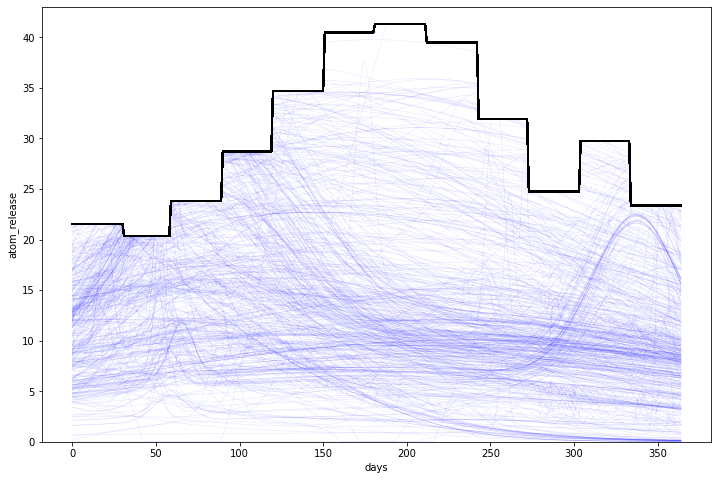

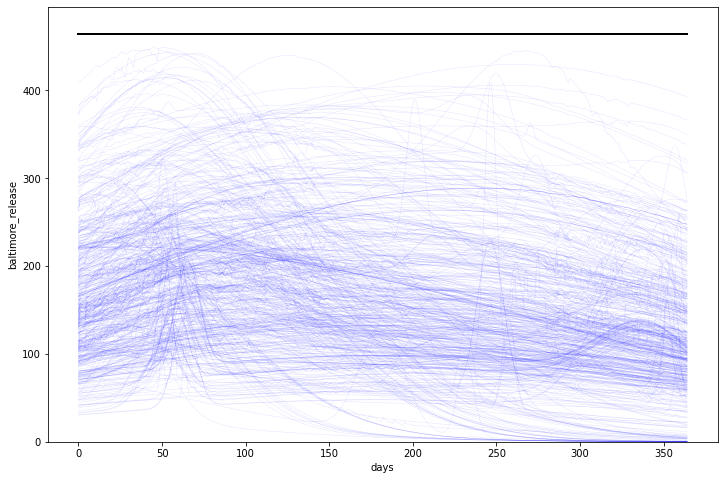

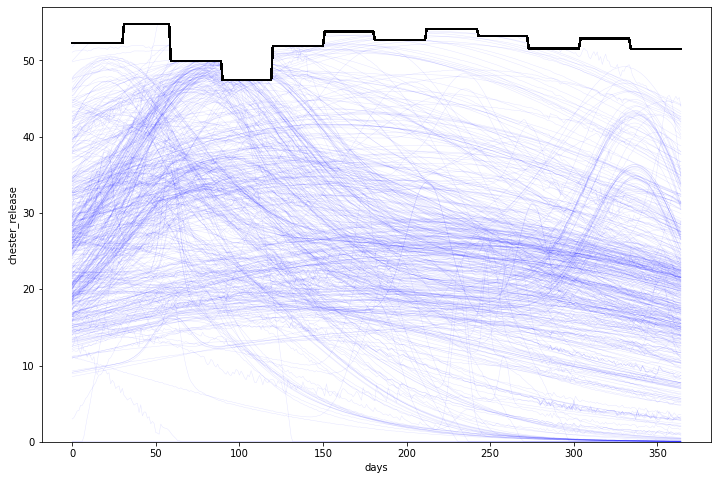

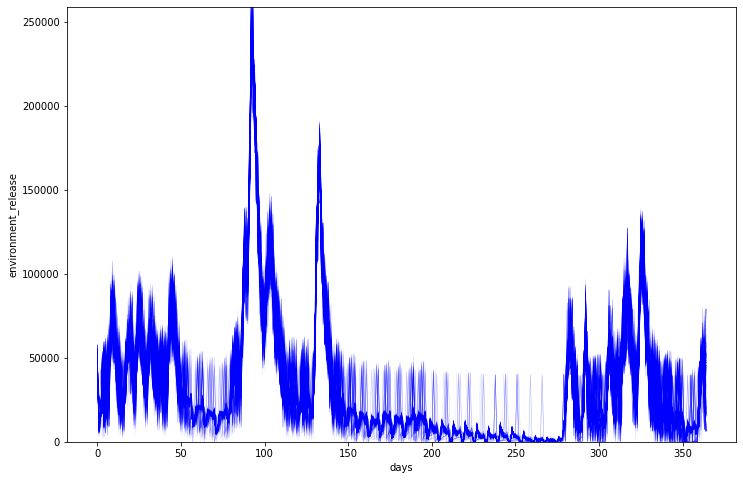

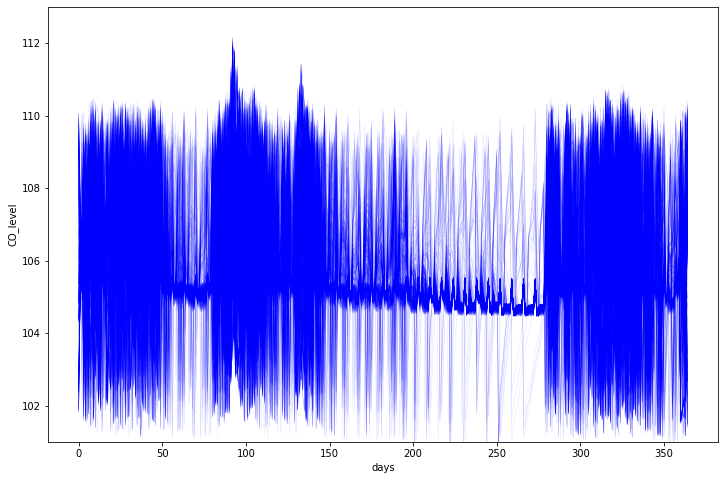

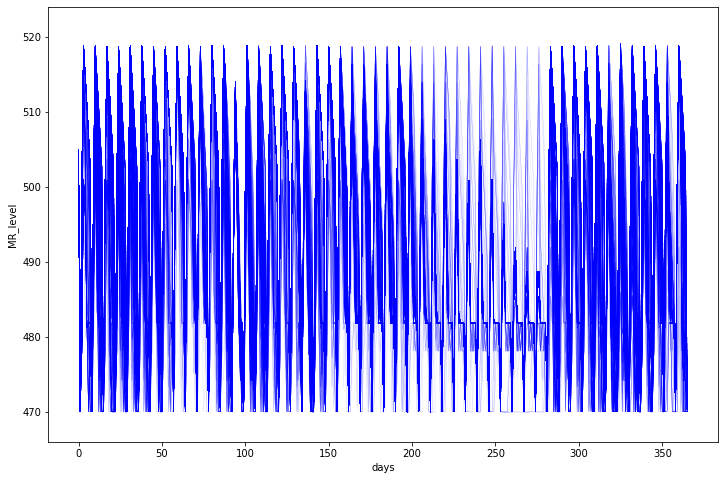

In [41]:
alpha = 0.1
lw = 0.5
for release in ratom:
   plot = plt.plot(release, "blue", linewidth=lw, alpha=alpha)
   plot = plt.plot(wAtomic, "black") 
   plot = plt.xlabel('days')
   plot = plt.ylabel('atom_release')
   plot = plt.ylim((0, 43))
plt.show()

for release in rbalt:
   plot = plt.plot(release, "blue", linewidth=lw, alpha=alpha)
   plot = plt.plot(wBaltimore, "black")
   plot = plt.xlabel('days')
   plot = plt.ylabel('baltimore_release')
   plot = plt.ylim((0, 495))
plt.show()

for release in rches:
   plot = plt.plot(release, "blue", linewidth=lw, alpha=alpha)
   plot = plt.plot(wChester, "black")
   plot = plt.xlabel('days')
   plot = plt.ylabel('chester_release')
   plot = plt.ylim((0, 57))
plt.show()

for release in renv:
   plot = plt.plot(release, "blue", linewidth=lw, alpha=alpha)
   plot = plt.xlabel('days')
   plot = plt.ylabel('environment_release')
   plot = plt.ylim((0, 259000))
plt.show()

for year in level_CO:
   plot = plt.plot(year, "blue", linewidth=lw, alpha=alpha)
   plot = plt.xlabel('days')
   plot = plt.ylabel('CO_level')
   plot = plt.ylim((101, 113))
plt.show()

for year in level_MR:
   plot = plt.plot(year, "blue", linewidth=lw, alpha=alpha)
   plot = plt.xlabel('days')
   plot = plt.ylabel('MR_level')
   plot = plt.ylim((466, 524))
plt.show()